In [25]:
import psycopg2
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import password

In [26]:
user = 'postgres'
password = password
host = 'localhost'
port = 5432  
dbname = 'EmployeeSQL'

engine = create_engine(f'postgres://{user}:{password}@{host}:{port}/{dbname}')
conn = engine.connect()

In [12]:
departments_data = pd.read_csv('data/departments.csv')
departments_data.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [28]:
dept_emp_data = pd.read_csv('data/dept_emp.csv')
dept_emp_data.head()
len(dept_emp_data)

331603

In [14]:
dept_manager_data = pd.read_csv('data/dept_manager.csv')
dept_manager_data.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [29]:
employees_data = pd.read_csv('data/employees.csv')
employees_data['birth_date'] = pd.to_datetime(employees_data['birth_date'])
employees_data['hire_date'] = pd.to_datetime(employees_data['hire_date'])
employees_data.head()
len(employees_data)

300024

In [16]:
salaries_data = pd.read_csv('data/salaries.csv')
salaries_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [17]:
titles_data = pd.read_csv('data/titles.csv')
titles_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [18]:
#titles_data
titles_data.to_sql('titles', conn, if_exists = 'append', index = False)

In [19]:
#departments_data
departments_data.to_sql('departments', conn, if_exists = 'append', index = False)

In [20]:
#employees_data
employees_data.to_sql('employees', conn, if_exists = 'append', index = False)

In [21]:
#salaries_data
salaries_data.to_sql('salaries', conn, if_exists = 'append', index = False)

In [25]:
#dept_manager_data
dept_manager_data.to_sql('dept_manager', conn, if_exists = 'append', index = False)

In [24]:
dept_emp_data.head()
dept_emp_data.to_sql('dept_emp', conn, if_exists = 'append', index = False)

In [4]:
employees_salary_db = pd.read_sql('select sex, title, salary from employees_db', conn)

In [5]:
employees_salary_db

,sex,title,salary
0,F,Engineer,48973
1,F,Senior Engineer,40000
2,M,Technique Leader,43548
3,F,Staff,63377
4,F,Senior Engineer,40000
...,...,...,...
300019,F,Staff,40000
300020,F,Technique Leader,40000
300021,M,Senior Engineer,59703
300022,M,Senior Engineer,48038


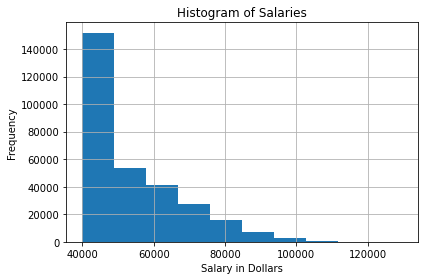

In [21]:

hist = employees_salary_db.hist()
plt.xlabel('Salary in Dollars')
plt.ylabel('Frequency')
plt.title('Histogram of Salaries')
plt.savefig("Histogram_of_Salaries.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [7]:
salary_gby_mean = employees_salary_db.groupby(['title']).mean()
salary_gby_mean

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


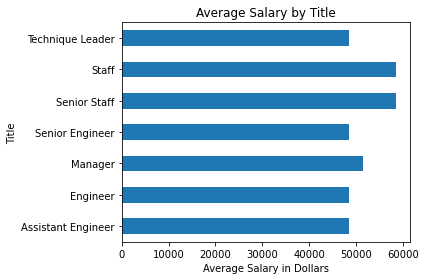

In [22]:
salary_gby_mean.plot.barh(legend = False)
plt.xlabel('Average Salary in Dollars')
plt.ylabel('Title')
plt.title('Average Salary by Title')
plt.savefig("BarChart.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

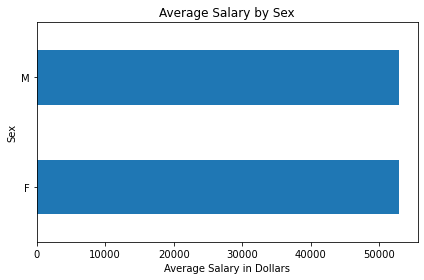

In [23]:
salary_sex_mean = employees_salary_db.groupby(['sex']).mean()


salary_sex_mean.plot.barh(legend = False)
plt.xlabel('Average Salary in Dollars')
plt.ylabel('Sex')
plt.title('Average Salary by Sex')
plt.savefig("BarChart_sex_salary.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

## My Employee Record is a fake record

In [11]:
#My Employee number
my_employee_record_db = pd.read_sql("select * from employees where emp_no = '499942'", conn)
my_employee_record_db

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
